<a href="https://colab.research.google.com/github/aniketDL/Twitter_Sentiment_Analysis/blob/master/hackathon_twitter_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.text import *
import pandas as pd

In [0]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sub_df = pd.read_csv('sample_submission.csv')

In [0]:
path = Path('/content')

In [0]:
train_data.head(1)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...


In [0]:
data_lm2 = (TextList.from_csv(path = path, csv_name='train.csv', cols='tweet')
                   .split_by_rand_pct(0.2)
                   .label_for_lm()
                   .databunch(bs=64)
          )

In [0]:
learn_lm3 = language_model_learner(data_lm2, AWD_LSTM)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


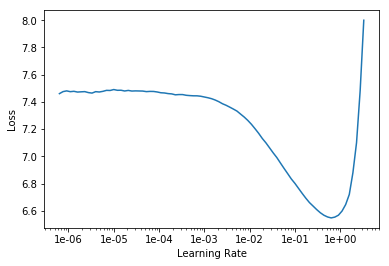

In [0]:
learn_lm3.lr_find()
learn_lm3.recorder.plot()

In [0]:
learn_lm3.fit_one_cycle(5, max_lr=slice(3e-01))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


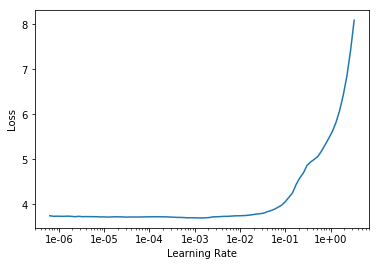

In [0]:
learn_lm2.lr_find()
learn_lm2.recorder.plot()

In [0]:
learn_lm2.unfreeze()

In [0]:
test_data.head(1)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...


In [0]:
dataclas2 = (TextList.from_csv(path = path, csv_name='train.csv', cols='tweet', vocab = data_lm2.vocab)
                    .split_by_rand_pct(0.2)
                    .label_from_df(cols='label')
                    .databunch(bs=32)
           )

In [0]:
learn_lm2.save_encoder('first-step-enc2')

In [0]:
testclass2 = (TextList.from_csv(path = path, csv_name='test.csv', cols='tweet'))

In [0]:
learn_classifier3 = text_classifier_learner(dataclas2, AWD_LSTM, drop_mult = 0.5)

In [0]:
learn_classifier3.load_encoder('first-step-enc2')

In [0]:
learn_classifier3.fit_one_cycle(3, max_lr=slice(5e-01), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.211420,0.338921,0.896746,00:36
1,0.516261,0.257484,0.929756,00:39
2,0.265676,0.254255,0.929756,00:37


In [0]:
learn_classifier3.unfreeze()

In [0]:
learn_classifier3.fit_one_cycle(3, max_lr=slice(5e-03/(2.6**4),5e-03), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.195208,0.206936,0.934136,01:27
1,0.136191,0.360517,0.948842,01:36
2,0.118968,0.144197,0.955257,01:30


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


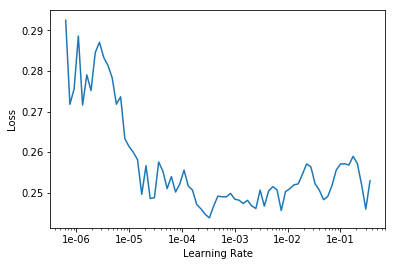

In [0]:
learn_classifier3.lr_find()
learn_classifier3.recorder.plot()

In [0]:
dataclas2.add_test(testclass2)

In [0]:
preds5, _ = learn_classifier3.get_preds(DatasetType.Test, ordered=True)

In [0]:
labels5 = [np.argmax(p).data.item() for p in preds5]

In [0]:
sub_df['label'] = labels5[:]

In [0]:
sub_df['label'].value_counts()

In [0]:
sub_df.to_csv('submission_aniket_sent3.csv', index=False)